# Summer precipitation anomaly detection using Autoencoder

In [1]:
import xarray as xr
import os
import glob
import pickle
import pandas as pd
import numpy as np
import scipy.stats
from turtle import width
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import transform
from minisom import MiniSom
from scipy.spatial import distance
from cnmaps import get_map, draw_map, clip_contours_by_map
import proplot as pplt

import matplotlib.pyplot as plt
import cmaps

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from pyimagesearch.convautoencoder import ConvAutoencoder

os.chdir('/Users/zeqinhuang/Documents/paper/anomalous_PREC')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
models = [
    'ACCESS-CM2','ACCESS-ESM1-5','BCC-CSM2-MR','CESM2-WACCM','CESM2','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5',
    'EC-Earth3-Veg-LR','EC-Earth3','FGOALS-g3','GFDL-CM4','GFDL-CM4_gr2','GFDL-ESM4','GISS-E2-1-G','HadGEM3-GC31-LL','HadGEM3-GC31-MM',
    'IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','KACE-1-0-G','KIOST-ESM','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR',
    'MRI-ESM2-0','NESM3','NorESM2-LM','NorESM2-MM','TaiESM1','UKESM1-0-LL']


In [3]:
## compute MSE error
def comp_error(images, autoencoder):
    time_max,_,_,_ = np.shape(images)
    errors_ = np.zeros(time_max)
    recons_ = autoencoder.predict_on_batch(images)
    for tt in range(time_max):
        errors_[tt] = np.mean((images[tt] - recons_[tt])**2)
    del(recons_)
    return errors_

def pad_remover(rdata,multidata=False):
    ndim = rdata.ndim
    if ndim==4:
        if multidata:
            recon = rdata[:,1:-2,2:-3,0] # padwidth1 = ((0,0),(1,2),(2,3))
        else:
            recon = rdata[0,1:-2,2:-3,0]
    elif ndim==3:
        recon = rdata[1:-2,2:-3,0]

    return recon

###############  MPI-ESM1-2-LR  ###############
Epoch 1/20


/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-12-13 09:37:11.518553: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


322/322 [==============================] - 59s 183ms/step - loss: 0.0060 - val_loss: 0.0044
Epoch 2/20
322/322 [==============================] - 59s 183ms/step - loss: 2.0169e-04 - val_loss: 4.4534e-04
Epoch 3/20
322/322 [==============================] - 60s 186ms/step - loss: 9.2678e-05 - val_loss: 8.6778e-05
Epoch 4/20
322/322 [==============================] - 59s 183ms/step - loss: 6.8809e-05 - val_loss: 6.5250e-05
Epoch 5/20
322/322 [==============================] - 61s 191ms/step - loss: 5.7499e-05 - val_loss: 7.0381e-05
Epoch 6/20
322/322 [==============================] - 58s 181ms/step - loss: 4.9357e-05 - val_loss: 4.6793e-05
Epoch 7/20
322/322 [==============================] - 58s 181ms/step - loss: 4.2738e-05 - val_loss: 4.3324e-05
Epoch 8/20
322/322 [==============================] - 59s 182ms/step - loss: 3.8858e-05 - val_loss: 5.9062e-05
Epoch 9/20
322/322 [==============================] - 59s 182ms/step - loss: 3.9439e-05 - val_loss: 3.8899e-05
Epoch 10/20
322/322 

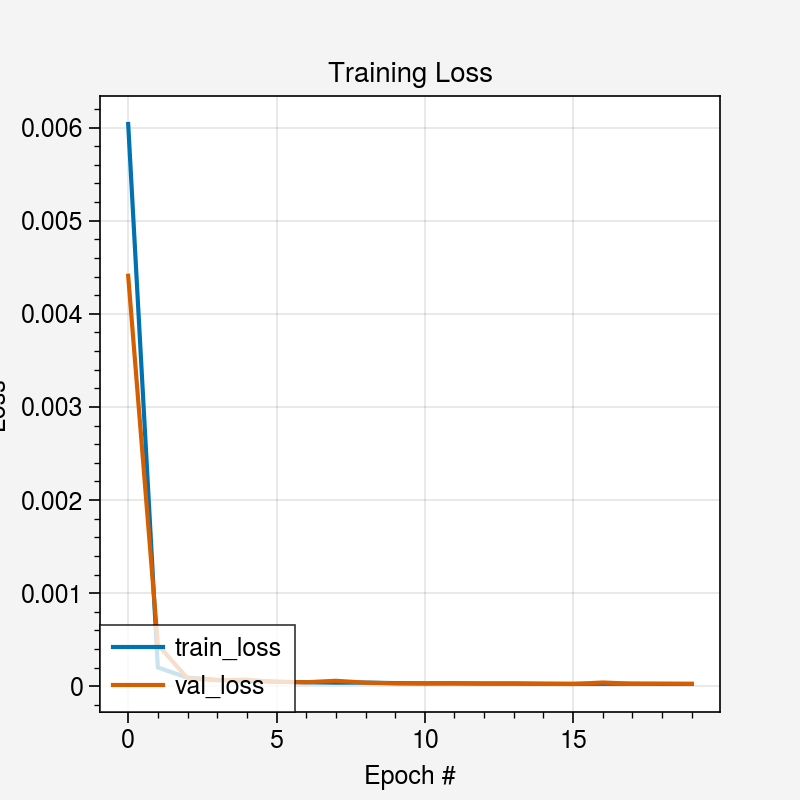




###############  MRI-ESM2-0  ###############
Epoch 1/20


/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


322/322 [==============================] - 61s 185ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 2/20
322/322 [==============================] - 59s 183ms/step - loss: 2.4360e-04 - val_loss: 3.9332e-04
Epoch 3/20
322/322 [==============================] - 58s 181ms/step - loss: 1.1675e-04 - val_loss: 1.0248e-04
Epoch 4/20
322/322 [==============================] - 61s 189ms/step - loss: 8.7244e-05 - val_loss: 7.7714e-05
Epoch 5/20
322/322 [==============================] - 60s 188ms/step - loss: 6.8791e-05 - val_loss: 6.9819e-05
Epoch 6/20
322/322 [==============================] - 58s 181ms/step - loss: 5.6581e-05 - val_loss: 5.5019e-05
Epoch 7/20
322/322 [==============================] - 59s 182ms/step - loss: 5.1920e-05 - val_loss: 1.1319e-04
Epoch 8/20
322/322 [==============================] - 62s 193ms/step - loss: 5.2572e-05 - val_loss: 4.5356e-05
Epoch 9/20
322/322 [==============================] - 60s 187ms/step - loss: 4.3964e-05 - val_loss: 4.4265e-05
Epoch 10/20
322/322 

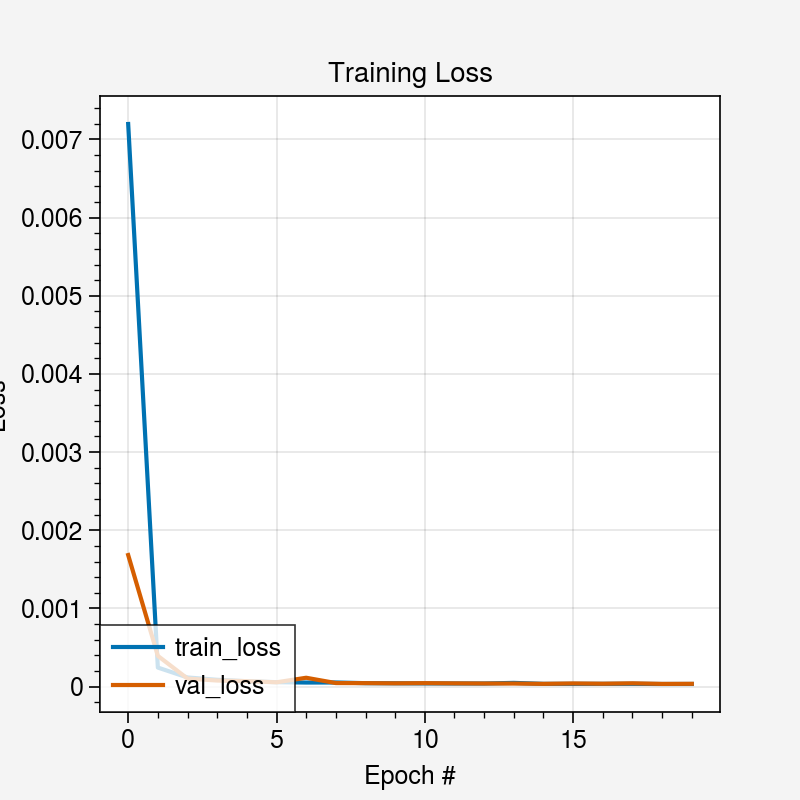




###############  NESM3  ###############
Epoch 1/20


/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


322/322 [==============================] - 61s 188ms/step - loss: 0.0054 - val_loss: 0.0137
Epoch 2/20
322/322 [==============================] - 62s 192ms/step - loss: 1.3607e-04 - val_loss: 0.0015
Epoch 3/20
322/322 [==============================] - 64s 198ms/step - loss: 8.4056e-05 - val_loss: 8.5711e-05
Epoch 4/20
322/322 [==============================] - 60s 186ms/step - loss: 6.2569e-05 - val_loss: 8.7149e-05
Epoch 5/20
322/322 [==============================] - 60s 186ms/step - loss: 5.1336e-05 - val_loss: 5.3264e-05
Epoch 6/20
322/322 [==============================] - 60s 186ms/step - loss: 4.3411e-05 - val_loss: 8.7890e-05
Epoch 7/20
322/322 [==============================] - 62s 193ms/step - loss: 3.7240e-05 - val_loss: 3.5149e-05
Epoch 8/20
322/322 [==============================] - 60s 185ms/step - loss: 3.3082e-05 - val_loss: 3.2403e-05
Epoch 9/20
322/322 [==============================] - 59s 184ms/step - loss: 3.2014e-05 - val_loss: 3.4320e-05
Epoch 10/20
322/322 [===

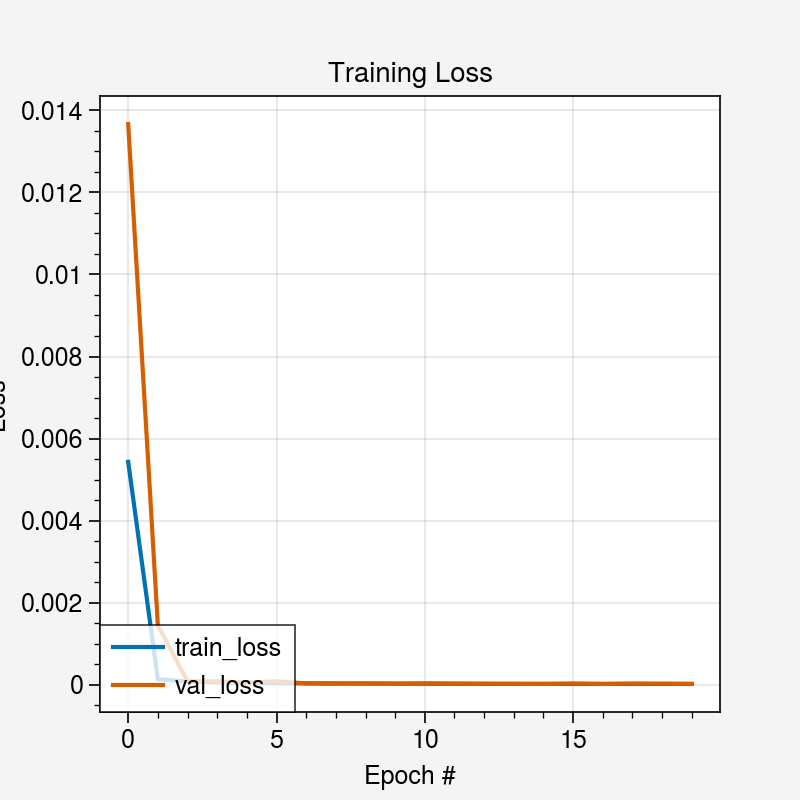




###############  NorESM2-LM  ###############
Epoch 1/20


/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


322/322 [==============================] - 61s 186ms/step - loss: 0.0069 - val_loss: 0.0121
Epoch 2/20
322/322 [==============================] - 61s 189ms/step - loss: 1.5810e-04 - val_loss: 0.0011
Epoch 3/20
322/322 [==============================] - 61s 188ms/step - loss: 8.4830e-05 - val_loss: 9.7488e-05
Epoch 4/20
322/322 [==============================] - 60s 186ms/step - loss: 6.0952e-05 - val_loss: 5.0841e-05
Epoch 5/20
322/322 [==============================] - 61s 190ms/step - loss: 4.8199e-05 - val_loss: 5.0792e-05
Epoch 6/20
322/322 [==============================] - 61s 189ms/step - loss: 4.0309e-05 - val_loss: 3.5588e-05
Epoch 7/20
322/322 [==============================] - 60s 187ms/step - loss: 3.4364e-05 - val_loss: 3.1174e-05
Epoch 8/20
322/322 [==============================] - 59s 184ms/step - loss: 3.1916e-05 - val_loss: 2.9762e-05
Epoch 9/20
322/322 [==============================] - 59s 184ms/step - loss: 2.7894e-05 - val_loss: 3.4425e-05
Epoch 10/20
322/322 [===

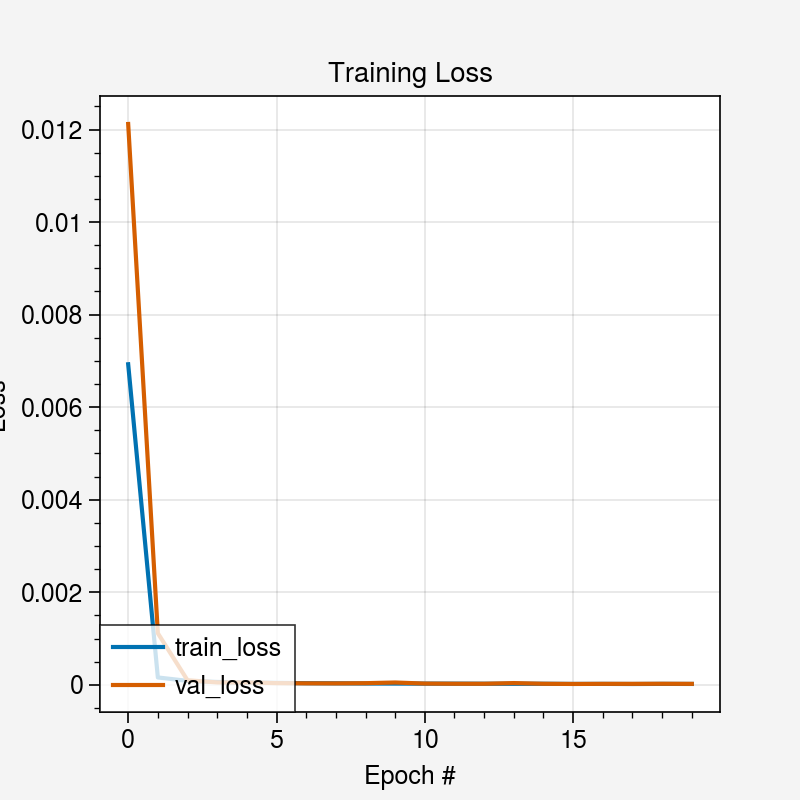




###############  NorESM2-MM  ###############
Epoch 1/20


/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


322/322 [==============================] - 68s 208ms/step - loss: 0.0083 - val_loss: 0.0012
Epoch 2/20
322/322 [==============================] - 62s 192ms/step - loss: 2.1622e-04 - val_loss: 4.8479e-04
Epoch 3/20
322/322 [==============================] - 60s 186ms/step - loss: 1.0795e-04 - val_loss: 1.2800e-04
Epoch 4/20
322/322 [==============================] - 59s 184ms/step - loss: 8.3761e-05 - val_loss: 7.5391e-05
Epoch 5/20
322/322 [==============================] - 59s 184ms/step - loss: 6.1047e-05 - val_loss: 6.7055e-05
Epoch 6/20
322/322 [==============================] - 59s 185ms/step - loss: 5.1682e-05 - val_loss: 5.0610e-05
Epoch 7/20
322/322 [==============================] - 60s 185ms/step - loss: 4.6103e-05 - val_loss: 4.8760e-05
Epoch 8/20
322/322 [==============================] - 60s 187ms/step - loss: 4.4414e-05 - val_loss: 6.8955e-05
Epoch 9/20
322/322 [==============================] - 60s 186ms/step - loss: 4.0414e-05 - val_loss: 4.4217e-05
Epoch 10/20
322/322 

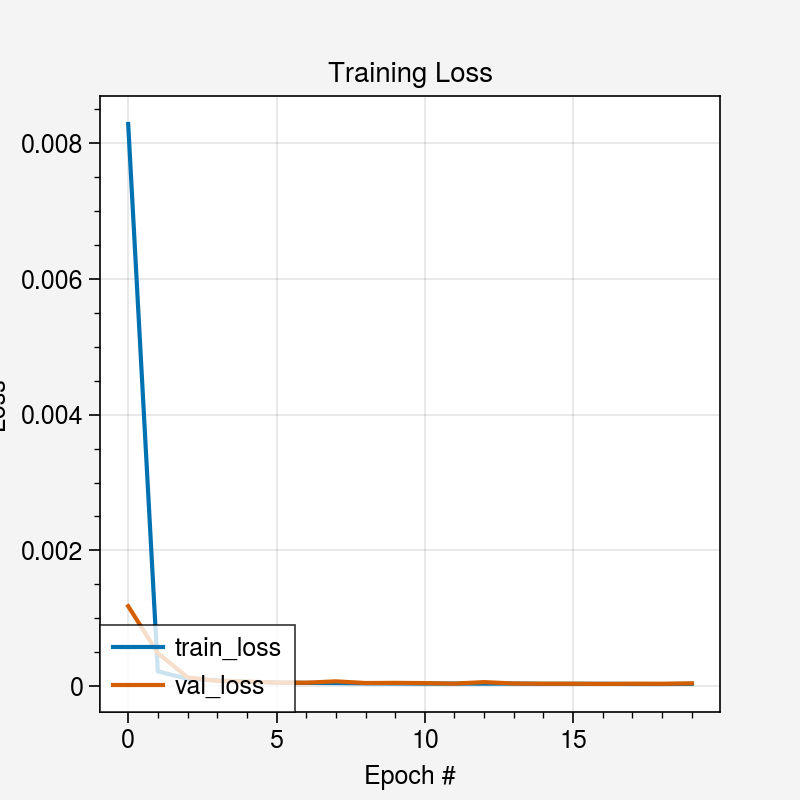




###############  TaiESM1  ###############
Epoch 1/20


/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


322/322 [==============================] - 64s 197ms/step - loss: 0.0137 - val_loss: 0.0087
Epoch 2/20
322/322 [==============================] - 59s 184ms/step - loss: 0.0061 - val_loss: 0.0072
Epoch 3/20
322/322 [==============================] - 60s 186ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/20
322/322 [==============================] - 60s 186ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 5/20
322/322 [==============================] - 57s 176ms/step - loss: 5.5956e-04 - val_loss: 4.9478e-04
Epoch 6/20
322/322 [==============================] - 58s 180ms/step - loss: 4.6900e-04 - val_loss: 4.7959e-04
Epoch 7/20
322/322 [==============================] - 57s 178ms/step - loss: 4.5892e-04 - val_loss: 4.5496e-04
Epoch 8/20
322/322 [==============================] - 58s 182ms/step - loss: 4.5398e-04 - val_loss: 4.5270e-04
Epoch 9/20
322/322 [==============================] - 57s 176ms/step - loss: 4.5068e-04 - val_loss: 4.4942e-04
Epoch 10/20
322/322 [=======================

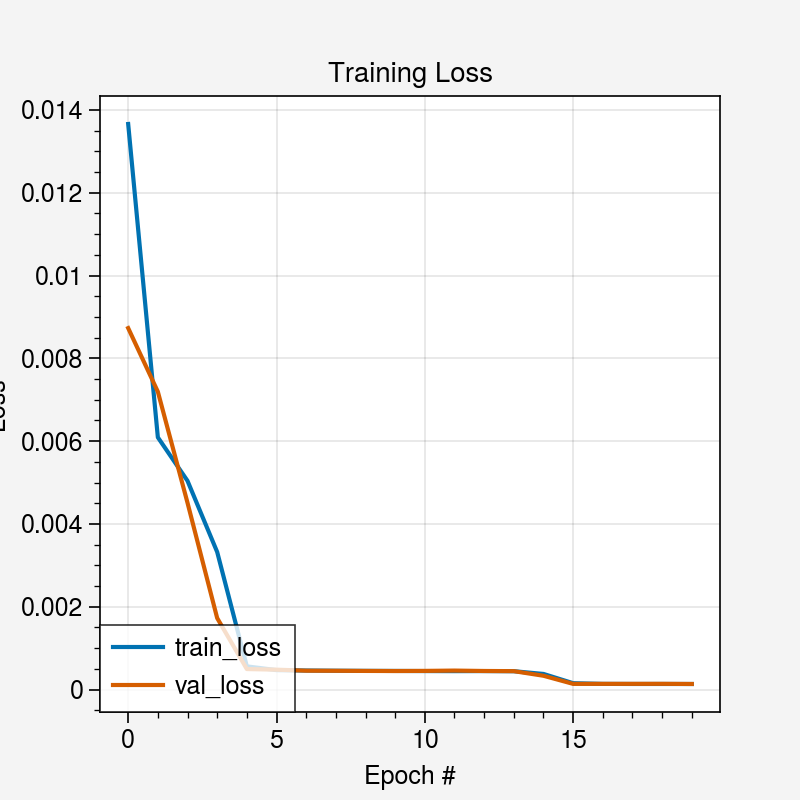




###############  UKESM1-0-LL  ###############
Epoch 1/20


/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


315/315 [==============================] - 58s 182ms/step - loss: 0.0127 - val_loss: 0.0106
Epoch 2/20
315/315 [==============================] - 56s 178ms/step - loss: 0.0069 - val_loss: 0.0087
Epoch 3/20
315/315 [==============================] - 56s 178ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 4/20
315/315 [==============================] - 56s 177ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 5/20
315/315 [==============================] - 56s 176ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 6/20
315/315 [==============================] - 56s 177ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 7/20
315/315 [==============================] - 59s 188ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 8/20
315/315 [==============================] - 59s 188ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 9/20
315/315 [==============================] - 59s 189ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 10/20
315/315 [==============================] - 59s 188ms/step - loss: 0.0042

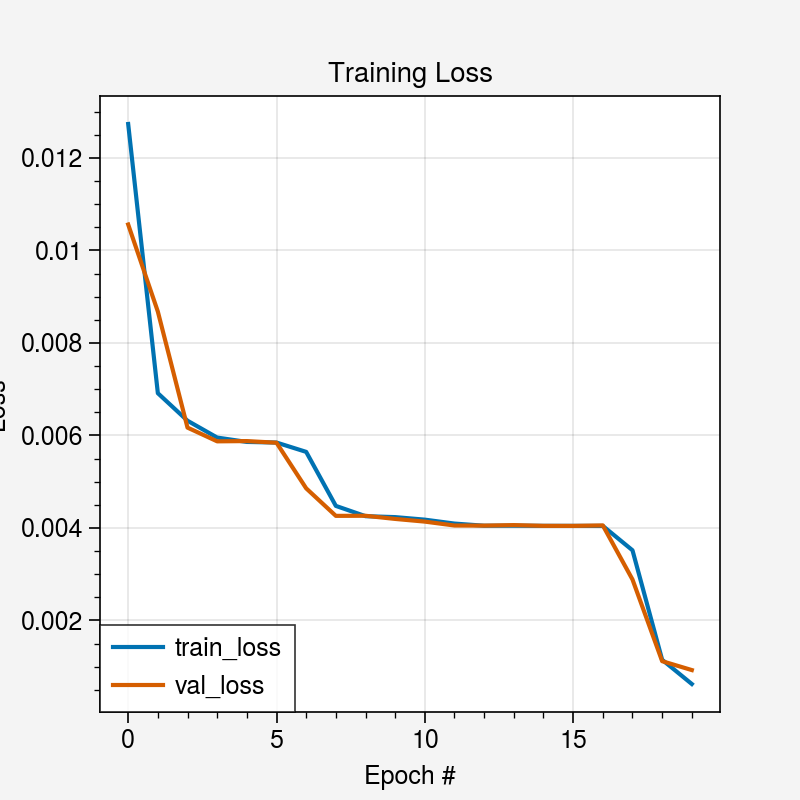

In [4]:
# create mask for ploting
for m in models:
    # m = models[0]
    if os.path.exists('autoencoder/processed_data/autoencoder_trained_summer_' + m + '_1981_2015_running.model'):
        continue
    else:
        print('#'*15 + '  ' + m + '  ' + '#'*15)

        # date for training
        ts = pd.date_range(start='1981-01-01',end='2099-12-31',freq='D')
        ts = ts.strftime('%Y%m%d')
        dates = pd.to_datetime(ts, format='%Y%m%d')
        dates_summer = dates[((dates.month > 4) & (dates.month < 11))]

        prec_ano = xr.open_dataarray('output/pr_' + m + '_1981_2099_running_anomalies.nc',decode_times=False)
        if len(prec_ano) != len(dates_summer):
            dates_summer = dates_summer[dates_summer.day != 31]
        prec_ano['time'] = dates_summer
        prec_ano = prec_ano.sel(time = slice('1981','2015'))

        mask = prec_ano.values[0]
        mask[~np.isnan(mask)] = 1
        lons = prec_ano['lon']
        lats = prec_ano['lat']

        ### set miss values as zeros
        prec_ano = prec_ano.values
        prec_ano = np.nan_to_num(prec_ano, copy=True, nan=0)

        ### Normalize
        minvalue = prec_ano.min()
        maxvalue = prec_ano.max()
        prec_norm = (prec_ano.squeeze() - minvalue)/(maxvalue - minvalue)

        ### padding for training
        padwidth1 = ((0,0),(1,1),(2,3))
        prec_norm_img_list = np.pad(prec_norm, pad_width=padwidth1,mode='constant',constant_values=0)
        prec_norm_img_list = np.expand_dims(prec_norm_img_list, axis=-1)
        time_max, lat_max, lon_max, zmax = np.shape(prec_norm_img_list)

        ### split training and testing data
        train_data, test_data, = train_test_split(prec_norm_img_list, test_size=0.2, random_state=1)

        ### initialize deep learning parameters
        EPOCHS = 20
        INIT_LR = 1e-3
        BS = 16

        ### construct convolutional autoencoder
        (encoder, decoder, autoencoder) = ConvAutoencoder.build(width=lon_max,height=lat_max,depth=zmax,filters=(32,64,128),latentDim=64)
        opt = Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
        autoencoder.compile(loss='mse',optimizer=opt)

        ### train the convolutional autoencoder
        H = autoencoder.fit(
            train_data,train_data,
            validation_data=(test_data,test_data),
            epochs=EPOCHS,
            batch_size=BS
        )

        ### Loss function plot
        N = np.arange(0,20)
        plt.plot(N, H.history["loss"], label="train_loss")
        plt.plot(N, H.history["val_loss"], label="val_loss")
        plt.title("Training Loss")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.legend(loc="lower left")
        plt.show()

        ### Save trained autoencoder model
        autoencoder.save('autoencoder/processed_data/autoencoder_trained_summer_' + m + '_1981_2015_running.model',save_format='h5')

        ### compute MSE error
        errors = comp_error(prec_norm_img_list, autoencoder)

        errors_all = []
        for i in range(len(prec_norm_img_list)//100+1):
            if i != len(prec_norm_img_list)//100:
                errors = comp_error(prec_norm_img_list[i*100:i*100+100], autoencoder)
            else:
                errors = comp_error(prec_norm_img_list[i*100:], autoencoder)
            errors_all = errors_all + errors.tolist()
            
        ### save error
        with open('autoencoder/processed_data/error_' + m + '_1981_2015_running.pickle', mode="wb") as f:
            pickle.dump(errors_all, f)

        print('\n\n')